# PSF model fit tutorial for single and blended sources

In [110]:
import numpy as np
import PSF_fits.utils.corner_modified as corner
import PSF_fits.PSF_model_fit as model_fit
import PSF_fits.PSF_joint_fit as joint_fit
import matplotlib.pyplot as plt
import astropy.io.fits as fits

import importlib
importlib.reload(PSF_fits)
importlib.reload(model_fit)

<module 'PSF_fits.PSF_model_fit' from '/home/minghan/PSF-Model-Fits/PSF_fits/PSF_model_fit.py'>

## Fitting a model to a single source

#### Real Data Example

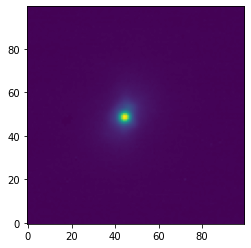

In [35]:
# Let's first load the example single star data
file = os.path.join('./examples', 'single_star.fits')
with fits.open(file) as hdul:
    image = hdul[0].data
plt.imshow(image, origin='lower')

Let's use the PSF_model_fit module to fit an analytical model to the single star

In [111]:
# first set up the fitbox size and the guess location of the star
fitboxsize = 11
guess_x, guess_y = (44, 49) # pixel coordinate of the star centroid, you can simply use the brightest pixel

fit = model_fit.PSFfit(fitboxsize)
fit.generate_data_stamp(image, guess_x, guess_y)

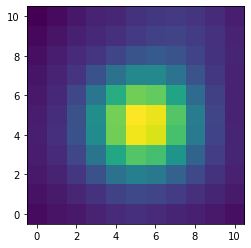

In [112]:
# Let's take a look at the cropped data stampe that will be used for fitting
plt.imshow(fit.data_stamp, origin='lower')

In [113]:
# Based on the data stamp, make some initial guesses for the PSF model parameters that we will be fitting
model_type = 'moffat'
fwhmx = 5.
fwhmy = 5.
theta = 0.
# if using a Moffat profile, then also define beta
beta = 1.5
# whether to fit for a constant background superposed on the analytical model
fitbg = True

# labels for the parameters defined for plotting
labels = ['x', 'y', 'fwhmx', 'fwhmy', r'$\theta$', r'$\beta$']

# Define MCMC parameters
nwalkers = 20
nsteps = 5000
burn_in = 1000

In [114]:
# Now run the MCMC fit
fit, sampler = model_fit.mcmc_fit(fit, fwhmx, fwhmy, theta, beta, model=model_type, fitbg=fitbg, nwalkers=nwalkers, nsteps=nsteps, discard=burn_in)

100%|██████████| 5000/5000 [00:23<00:00, 211.99it/s]


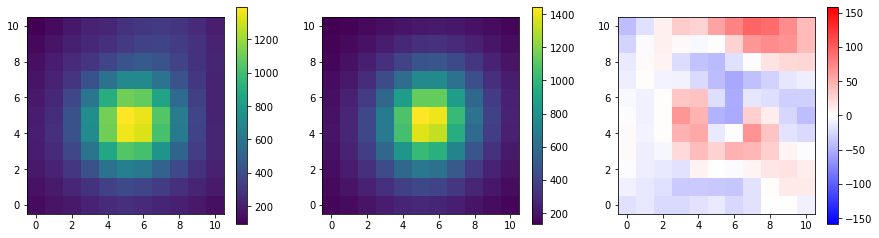

In [117]:
# Inspect the best fit results
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
resid = fit.data_stamp - fit.bestfitmodel
mappable = axes[0].imshow(fit.data_stamp, origin='lower')
fig.colorbar(mappable, ax=axes[0])
mappable = axes[1].imshow(fit.bestfitmodel, origin='lower')
fig.colorbar(mappable, ax=axes[1])
mappable = axes[2].imshow(resid, origin='lower', cmap='bwr', vmax=np.std(resid)*5, vmin=-np.std(resid)*5)
fig.colorbar(mappable, ax=axes[2])

In [123]:
# print results
print('(x, y): ({:.2f}, {:.2f}) +- ({:.2f}, {:.2f}) pixels\n'.format(fit.fitx, fit.fity, fit.fitxerr, fit.fityerr), 
      'fwhmx: {:.1f} +- {:.1f}, fwhmy: {:.1f} +- {:.1f}\n'.format(fit.fitfwhmx, fit.fitfwhmxerr, fit.fitfwhmy, fit.fitfwhmyerr),
      'theta: {:.1f} +- {:.1f} degrees\n'.format(fit.fittheta, fit.fitthetaerr),
      'beta: {:.2f} +- {:.2f}\n'.format(fit.fitbeta, fit.fitbetaerr))

(x, y): (44.41, 48.68) +- (0.02, 0.02) pixels
 fwhmx: 4.1 +- 0.1, fwhmy: 4.5 +- 0.1
 theta: -0.4 +- 0.1 degrees
 beta: 1.92 +- 0.23



## Fitting a model to blended sources

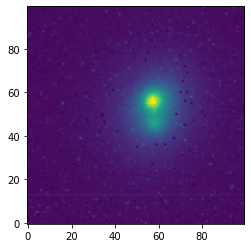

In [34]:
file = os.path.join('./examples', 'blended_binary.fits')
with fits.open(file) as hdul:
    image = hdul[0].data
plt.imshow(image, origin='lower')